# Preparing the Python code and dependencies for AWS Lambda

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AccelerationConsortium/ac-microcourses/blob/main/docs/courses/hello-world/1.5.2-mongodb-aws-lambda-prep.ipynb)

For simplicity, we'll package `pymongo`, our Python dependency, along with our `lambda_function.py` script per the [guidelines in the AWS docs](https://docs.aws.amazon.com/lambda/latest/dg/python-package.html). See also the [How to Use PyMongo to Connect MongoDB Atlas with AWS Lambda](https://www.mongodb.com/developer/products/atlas/awslambda-pymongo/) MongoDB tutorial and the [Manage Connections with AWS Lambda](https://www.mongodb.com/docs/atlas/manage-connections-aws-lambda/) MongoDB documentation page.

In [1]:
%mkdir dependencies

In [2]:
%pip install --target ./dependencies pymongo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 21.1 MB/s eta 0:00:00


In [3]:
%%writefile lambda_function.py
import os
from pymongo import MongoClient


client = MongoClient(host=os.environ.get("ATLAS_URI"))


def lambda_handler(event, context):
    # Name of database
    db = client.test

    # Name of collection
    collection = db.test

    # Document to add inside
    document = {"first name": "Anaiya", "last name": "Raisinghani"}


    # Insert document
    result = collection.insert_one(document)


    if result.inserted_id:
        return "Document inserted successfully"
    else:
        return "Failed to insert document"

Writing lambda_function.py


In [4]:
%cd dependencies
!zip -r ../deployment.zip *
%cd ..
!zip deployment.zip lambda_function.py

/content/dependencies
  adding: bson/ (stored 0%)
  adding: bson/time64.h (deflated 66%)
  adding: bson/datetime_ms.py (deflated 67%)
  adding: bson/int64.py (deflated 43%)
  adding: bson/errors.py (deflated 52%)
  adding: bson/py.typed (deflated 24%)
  adding: bson/_cbson.cpython-311-x86_64-linux-gnu.so (deflated 67%)
  adding: bson/buffer.h (deflated 55%)
  adding: bson/time64.c (deflated 72%)
  adding: bson/bson-endian.h (deflated 78%)
  adding: bson/binary.py (deflated 74%)
  adding: bson/__pycache__/ (stored 0%)
  adding: bson/__pycache__/_helpers.cpython-311.pyc (deflated 38%)
  adding: bson/__pycache__/dbref.cpython-311.pyc (deflated 53%)
  adding: bson/__pycache__/timestamp.cpython-311.pyc (deflated 59%)
  adding: bson/__pycache__/decimal128.cpython-311.pyc (deflated 56%)
  adding: bson/__pycache__/max_key.cpython-311.pyc (deflated 56%)
  adding: bson/__pycache__/datetime_ms.cpython-311.pyc (deflated 56%)
  adding: bson/__pycache__/__init__.cpython-311.pyc (deflated 61%)
  addi

Download `deployment.zip` using the left navigation bar by hovering over the file, clicking the three vertical dots, and clicking "download". If you don't see the, you may need to click the refresh icon above the files. You will then upload this `.zip` file to AWS Lambda.

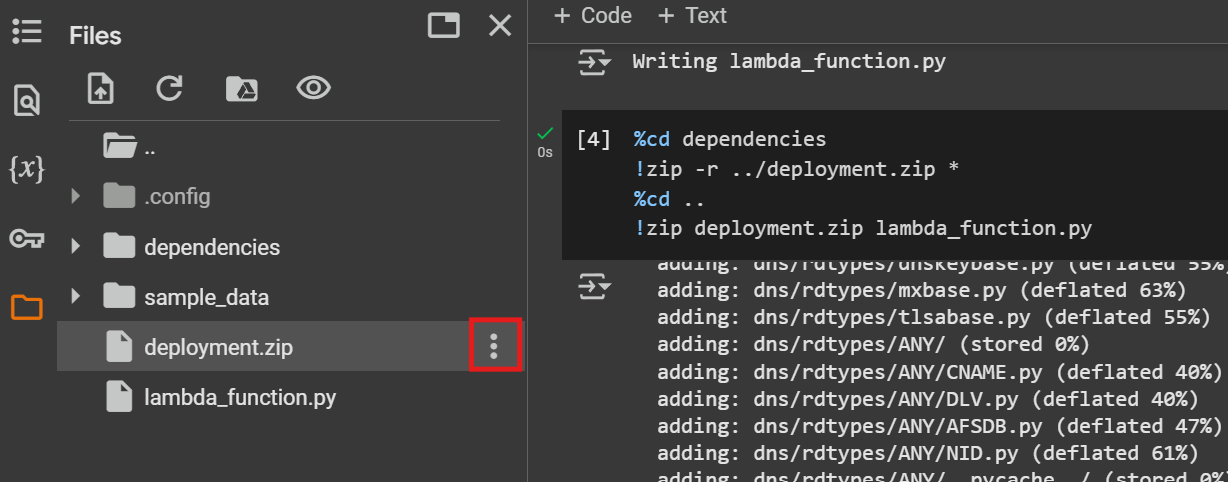